In [19]:
import numpy as np
import pandas as pd
import nibabel as nib
import scipy.stats as ss
import func_plot as fp
from enigmatoolbox.datasets import load_sc, load_fc
from enigmatoolbox.permutation_testing import spin_test
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
fc = load_fc('schaefer_200')[0]
sc = load_sc('schaefer_200')[0]
fc68 = load_fc('aparc')[0]
sc68 = load_sc('aparc')[0]
schaefer200 = nib.load('./Schaefer2018_200Parcels_7Networks_order.dlabel.nii').get_fdata()[0]
dk68 = np.loadtxt('./fs_LR.dk.txt')
pos = pd.read_csv('Pos_Schizotypy_CT_Meta_NoGT_corr_final.csv')['meta.wthk.r'][:68]
neg = pd.read_csv('Neg_Schizotypy_CT_Meta_NoGT_corr_final.csv')['meta.wthk.r'][:68]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [21]:
from matplotlib.colors import LinearSegmentedColormap

# Define color range from blue to grey
colors = [
    "#1f77b4",  # blue
    "#c6d4e1",  # light blue
    "white",    # middle white
    "#999999",  # light grey
    "black"   # darker grey
]

# Create the colormap
blue_grey_cmap = LinearSegmentedColormap.from_list("blue_grey", colors)

# convert from dk68 to schaefer200

In [22]:
pos_200 = np.zeros(200)
neg_200 = np.zeros(200)
pos_tmp = np.zeros(dk68.shape)
neg_tmp = np.zeros(dk68.shape)
for i in range(68):
    pos_tmp[dk68==i+1] = pos[i]
    neg_tmp[dk68==i+1] = neg[i]
for j in range(200):
    pos_200[j] = np.nanmean(pos_tmp[schaefer200==j+1])
    neg_200[j] = np.nanmean(neg_tmp[schaefer200==j+1])

# results of the convertion
ss.pearsonr(pos_200, neg_200), ss.pearsonr(pos, neg)

(PearsonRResult(statistic=0.3220985204221906, pvalue=3.300632858017693e-06),
 PearsonRResult(statistic=0.4472126802498643, pvalue=0.00013162768850998578))

PearsonRResult(statistic=-0.48724088400169596, pvalue=2.5455016266418995e-13) P_spin 0.001


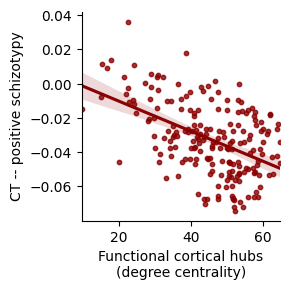

In [23]:
fc200_dc = np.sum(fc, axis=0)
sc200_dc = np.sum(sc, axis=0)

## Postive and FC_DC
pspin = spin_test(fc200_dc, pos_200, surface_name='fsa5', parcellation_name='schaefer_200',
        type='pearson', n_rot=1000, null_dist=False)

print(ss.pearsonr(fc200_dc, pos_200), 'P_spin', pspin)

fig, ax = plt.subplots(figsize=(3,3))
sns.regplot(fc200_dc, pos_200, ax=ax,
            color='darkred', scatter_kws={'s':10})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Functional cortical hubs\n(degree centrality)")
ax.set_ylabel("CT -- positive schizotypy")

fig.tight_layout()
fig.savefig('./fcdc_pos_scheafer200.png', transparent=True, dpi=300)

PearsonRResult(statistic=0.1300367071520912, pvalue=0.0664656789242515) P_spin 0.27749999999999997


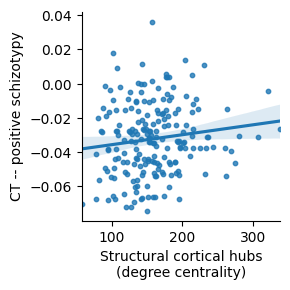

In [24]:
## Postive and SC_DC
pspin = spin_test(sc200_dc, pos_200, surface_name='fsa5', parcellation_name='schaefer_200',
        type='pearson', n_rot=1000, null_dist=False)

print(ss.pearsonr(sc200_dc, pos_200), 'P_spin', pspin)

fig, ax = plt.subplots(figsize=(3,3))
sns.regplot(sc200_dc, pos_200, ax=ax,
            color='#1f77b4', scatter_kws={'s':10})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Structural cortical hubs\n(degree centrality)")
ax.set_ylabel("CT -- positive schizotypy")

fig.tight_layout()
fig.savefig('./scdc_pos_scheafer200.png', transparent=True, dpi=300)

PearsonRResult(statistic=-0.3412431621622587, pvalue=7.618503190104627e-07) P_spin 0.0605


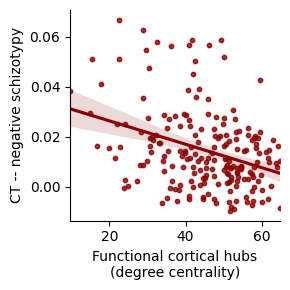

In [25]:
## Negative and FC_DC
pspin = spin_test(fc200_dc, neg_200, surface_name='fsa5', parcellation_name='schaefer_200',
        type='pearson', n_rot=1000, null_dist=False)

print(ss.pearsonr(fc200_dc, neg_200), 'P_spin', pspin)

fig, ax = plt.subplots(figsize=(3,3))
sns.regplot(fc200_dc, neg_200, ax=ax,
            color='darkred', scatter_kws={'s':10})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Functional cortical hubs\n(degree centrality)")
ax.set_ylabel("CT -- negative schizotypy")

fig.tight_layout()
fig.savefig('./fcdc_neg_scheafer200.png', transparent=True, dpi=300)

PearsonRResult(statistic=0.37228385589543517, pvalue=5.6900203545919195e-08) P_spin 0.0


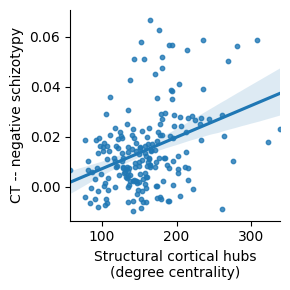

In [26]:
## Negative and SC_DC
pspin = spin_test(sc200_dc, neg_200, surface_name='fsa5', parcellation_name='schaefer_200',
        type='pearson', n_rot=1000, null_dist=False)

print(ss.pearsonr(sc200_dc, neg_200), 'P_spin', pspin)

fig, ax = plt.subplots(figsize=(3,3))
sns.regplot(sc200_dc, neg_200, ax=ax,
            color='#1f77b4', scatter_kws={'s':10})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Structural cortical hubs\n(degree centrality)")
ax.set_ylabel("CT -- negative schizotypy")

fig.tight_layout()
fig.savefig('./scdc_neg_scheafer200.png', transparent=True, dpi=300)

In [27]:
# epicenter analysis

fc_epi_pos = np.zeros((200,3))
sc_epi_pos = np.zeros((200,3))
fc_epi_neg = np.zeros((200,3))
sc_epi_neg = np.zeros((200,3))

for i in range(68):
    fc_epi_pos[i,:2] = ss.pearsonr(pos_200, fc[i])
    fc_epi_pos[i,2] = spin_test(pos_200, fc[i], surface_name='fsa5', parcellation_name='schaefer_200',
                                type='pearson', n_rot=1000, null_dist=False)
    sc_epi_pos[i,:2] = ss.pearsonr(pos_200, sc[i])
    sc_epi_pos[i,2] = spin_test(pos_200, sc[i], surface_name='fsa5', parcellation_name='schaefer_200',
                                type='pearson', n_rot=1000, null_dist=False)
    fc_epi_neg[i,:2] = ss.pearsonr(neg_200, fc[i])
    fc_epi_neg[i,2] = spin_test(neg_200, fc[i], surface_name='fsa5', parcellation_name='schaefer_200',
                                type='pearson', n_rot=1000, null_dist=False)
    sc_epi_neg[i,:2] = ss.pearsonr(neg_200, sc[i])
    sc_epi_neg[i,2] = spin_test(neg_200, sc[i], surface_name='fsa5', parcellation_name='schaefer_200',
                                type='pearson', n_rot=1000, null_dist=False)

In [ ]:
np.savetxt('./fc_epicenter_pos_schaefer200.txt', fc_epi_pos) # r, p_raw, p_spin
np.savetxt('./sc_epicenter_pos_schaefer200.txt', sc_epi_pos)
np.savetxt('./fc_epicenter_neg_schaefer200.txt', fc_epi_neg)
np.savetxt('./sc_epicenter_neg_schaefer200.txt', sc_epi_neg)

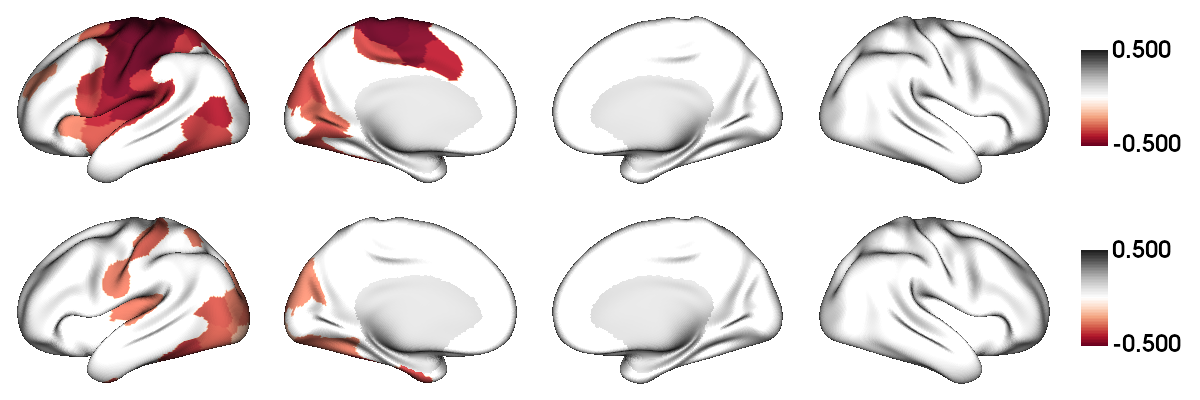

In [29]:
tmp1 = fc_epi_pos.copy()
tmp1[:,0][tmp1[:,2]>0.05] = 0
tmp2 = fc_epi_neg.copy()
tmp2[:,0][tmp2[:,2]>0.05] = 0
tmp = [tmp1[:,0], tmp2[:,0]]

plot = [None] * len(tmp)
for i in range(len(tmp)):
  plot[i] = schaefer200.copy()
  for j in range(200):
    plot[i][schaefer200==j+1] = tmp[i][j]
  plot[i][schaefer200==0] = np.nan

fp.plot_surface(data=plot, size=(1200,200*len(tmp)), cmap='RdGy', color_range=(-0.5,0.5),
                display=True, filename='./fc_epicenter_scheafer200.png')

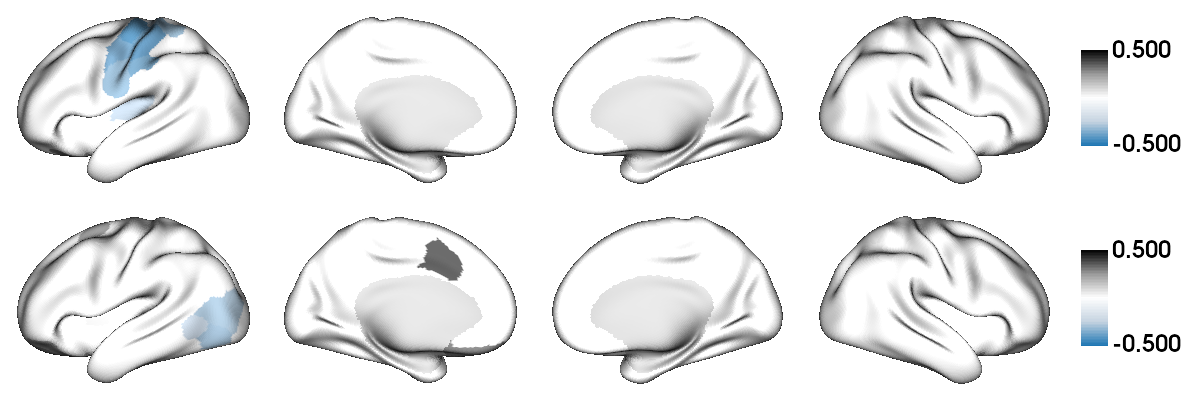

In [30]:
tmp1 = sc_epi_pos.copy()
tmp1[:,0][tmp1[:,2]>0.05] = 0
tmp2 = sc_epi_neg.copy()
tmp2[:,0][tmp2[:,2]>0.05] = 0
tmp = [tmp1[:,0], tmp2[:,0]]

plot = [None] * len(tmp)
for i in range(len(tmp)):
  plot[i] = schaefer200.copy()
  for j in range(200):
    plot[i][schaefer200==j+1] = tmp[i][j]
  plot[i][schaefer200==0] = np.nan

fp.plot_surface(data=plot, size=(1200,200*len(tmp)), cmap=blue_grey_cmap, color_range=(-0.5,0.5),
                display=True, filename='./sc_epicenter_scheafer200.png')

# network-null schaefer200

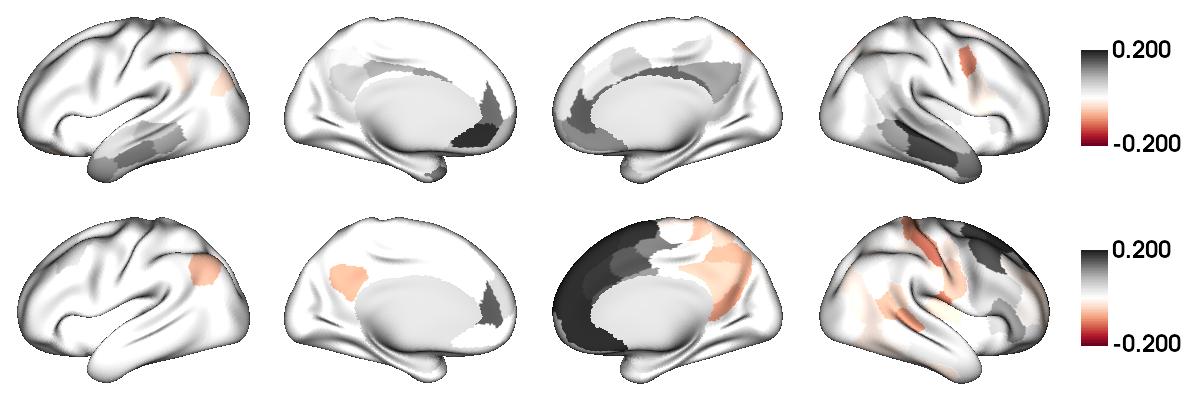

In [31]:
tmp1 = np.loadtxt('./fc_networknull_epicenter_pos_schaefer200.txt')
tmp1[:,0][tmp1[:,1]>0.05] = 0
tmp2 = np.loadtxt('./fc_networknull_epicenter_neg_schaefer200.txt')
tmp2[:,0][tmp2[:,1]>0.05] = 0
tmp = [tmp1[:,0], tmp2[:,0]]

plot = [None] * len(tmp)
for i in range(len(tmp)):
  plot[i] = schaefer200.copy()
  for j in range(200):
    plot[i][schaefer200==j+1] = tmp[i][j]
  plot[i][schaefer200==0] = np.nan

fp.plot_surface(data=plot, size=(1200,200*len(tmp)), cmap='RdGy', color_range=(-0.2,0.2),
                display=True, filename='./fc_networknull_epicenter_schaefer200.png')

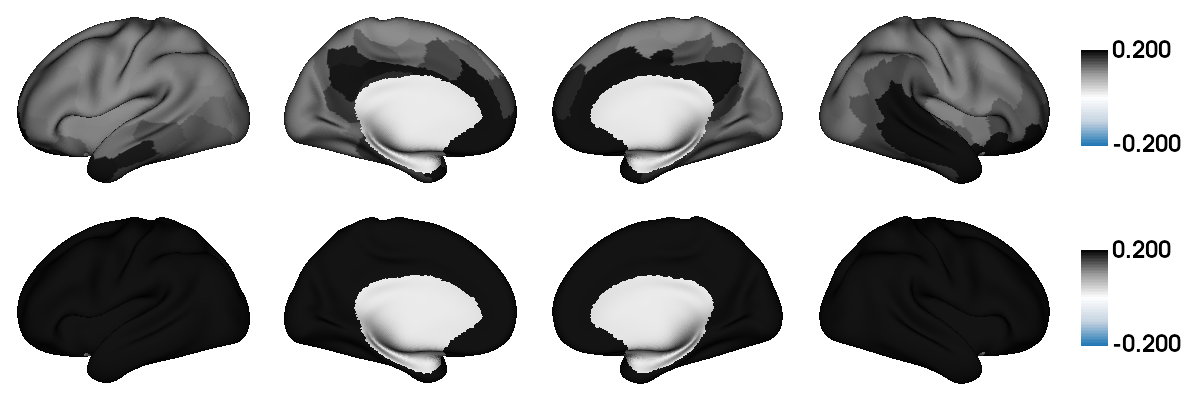

In [32]:
tmp1 = np.loadtxt('./sc_networknull_epicenter_pos_schaefer200.txt')
tmp1[:,0][tmp1[:,1]>0.05] = 0
tmp2 = np.loadtxt('./sc_networknull_epicenter_neg_schaefer200.txt')
tmp2[:,0][tmp2[:,1]>0.05] = 0
tmp = [tmp1[:,0], tmp2[:,0]]

plot = [None] * len(tmp)
for i in range(len(tmp)):
  plot[i] = schaefer200.copy()
  for j in range(200):
    plot[i][schaefer200==j+1] = tmp[i][j]
  plot[i][schaefer200==0] = np.nan

fp.plot_surface(data=plot, size=(1200,200*len(tmp)), cmap=blue_grey_cmap, color_range=(-0.2,0.2),
                display=True, filename='./sc_networknull_epicenter_schaefer200.png')